In [1]:
import xarray as xr
from matplotlib import pyplot as plt, animation
import numpy as np
from datetime import datetime
from salishsea_tools import geo_tools#, places

In [2]:
# Define paths
paths = {
    'coords': '/ocean/rbeutel/MEOPAR/grid/coordinates_seagrid_SalishSea201702.nc',
    'mask': '/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc',
#     'out': './results',
}

In [3]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

Text(0.5, 0, 'grid  i')

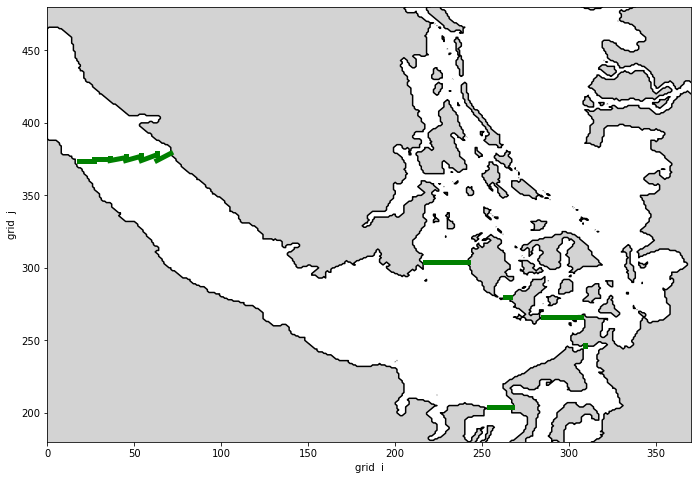

In [30]:
fig, ax = plt.subplots(figsize=(19, 8))
ax.contourf(mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_xlim([0, 370])
ax.set_ylim([180,480])
ax.set_aspect(5/6)
nmin, nmax = 0, -1

# for traj in range(n):
#     s = ax.scatter(aa[traj, nmin:nmax], bb[traj, nmin:nmax],c='grey')
# ax.scatter(og_aa,og_bb,c='k', marker='*', linewidths=8)

#add some lines where you think the boundaries should be, boundary 1 is the mouth of the JDF
ax.plot([18,27],[374,374],'g', linewidth = 5, label="Jordan River")
ax.plot([27,36],[375,375],'g', linewidth = 5)
ax.plot([36,45],[374,376],'g', linewidth = 5)
ax.plot([45,54],[374,377],'g', linewidth = 5)
ax.plot([54,63],[374,378],'g', linewidth = 5)
ax.plot([63,71],[374,379],'g', linewidth = 5)
ax.plot([27,27],[374,375],'g', linewidth = 5)
ax.plot([36,36],[375,376],'g', linewidth = 5)
ax.plot([45,45],[376,377],'g', linewidth = 5)
ax.plot([54,54],[377,378],'g', linewidth = 5)
ax.plot([63,63],[378,379],'g', linewidth = 5)

ax.plot([255-1,267],[204,204],'g', linewidth = 5, label="Admiralty")
ax.plot([309,309],[246,247],'g', linewidth = 5, label="Deception")
ax.plot([264-1,266],[280,280],'g', linewidth = 5, label="San Juan")
ax.plot([286-1,307],[266,266],'g', linewidth = 5, label="Rosario")
ax.plot([218-1,242],[304,304],'g', linewidth = 5, label="Haro")
# ax.legend()
ax.set_ylabel('grid  j')
ax.set_xlabel('grid  i')